In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/lavoura_permanente.csv')
df.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'produto', 'area_destinada_colheita',
       'area_colhida', 'quantidade_produzida', 'rendimento_medio_producao',
       'valor_producao'],
      dtype='object')

0                 Banana (cacho)
1                 Banana (cacho)
2           Café (em grão) Total
3           Café (em grão) Total
4                        Abacate
                    ...         
10306165                 Abacate
10306166          Banana (cacho)
10306167                  Goiaba
10306168                 Laranja
10306169                   Limão
Name: produto, Length: 10306170, dtype: object


Text(0.5, 0, 'Hectares')

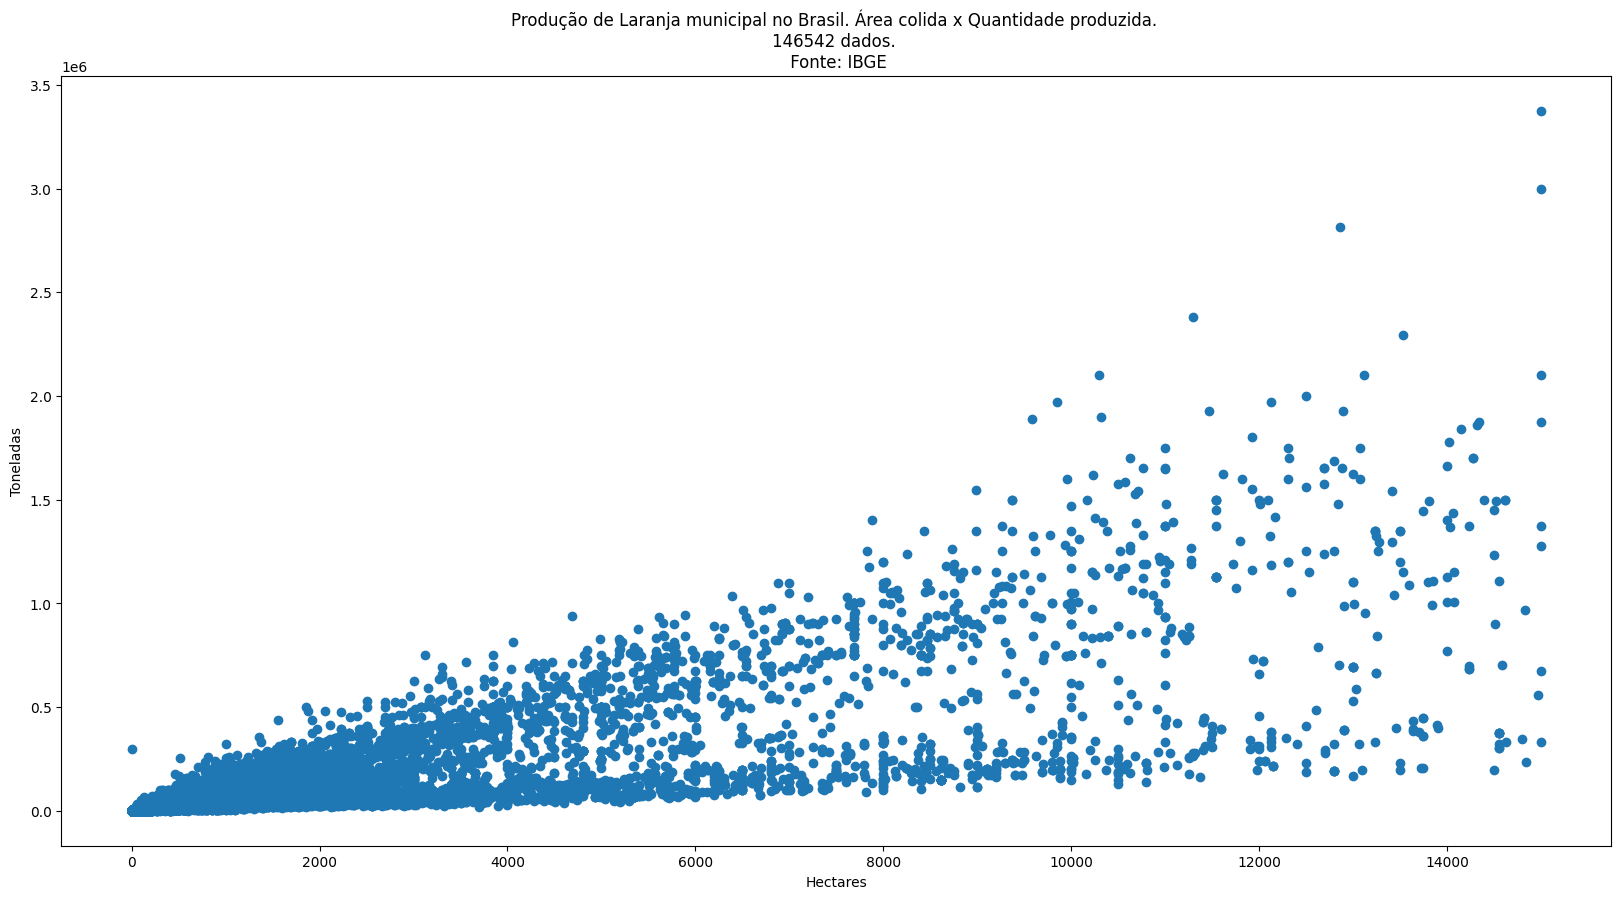

In [ ]:
df = df.dropna(subset='area_colhida')
df = df.dropna(subset='quantidade_produzida')

df = df[df['produto'] == 'Laranja']

x_axis = df[df['area_colhida'] <= 15000]['area_colhida']
y_axis = df[df['area_colhida'] <= 15000]['quantidade_produzida']


data_lenght = len(x_axis)

plt.figure(figsize=(15, 5))
plt.scatter(x_axis, y_axis)
plt.title(f'Produção de Laranja municipal no Brasil. Área colida x Quantidade produzida. \n{data_lenght} dados. \n Fonte: IBGE')

plt.ylabel('Toneladas')
plt.xlabel('Hectares')
